## Importar bibliotecas

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Ler os dados e fazer a limpeza/ transformações necessárias

In [34]:
data_churn = pd.read_csv('../data/data_churn_clean.csv')
df_report = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

data_churn.drop(columns=["customerID"], axis=1, inplace=True)

data_churn["Churn"] = (data_churn["Churn"] == "Yes").astype(int)

In [35]:
# transformando as variáveis categóricas em variáveis dummy
data_churn_categories = pd.get_dummies(data_churn[['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']], drop_first=True)


## Funções comuns

In [36]:
def store_metrics(model_name, y_test, y_pred):
  '''
    Stores the metrics of the model in the df_report DataFrame.

    Parameters:
    model_name: string
    y_test: numpy array
    y_pred: numpy array
  '''
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  df_report.loc[len(df_report)] = [model_name, precision, recall, f1, accuracy]

In [37]:
def confusion_matrix_builder(model, y_test , y_pred):
    '''
    Builds the confusion matrix of the model.

    Parameters:
    model: string
    y_test: numpy array
    y_pred: numpy array
    
    '''
    confusion_matrix = metrics.confusion_matrix(y_test , y_pred)

    sns.heatmap(confusion_matrix,
                annot=True,
                fmt='g',
                xticklabels=['Ativo','Churn'],
                yticklabels=['Ativo','Churn'], 
                cmap='Blues',)


    plt.ylabel('Atual',fontsize=12)
    plt.xlabel('Previsão',fontsize=12)
    plt.title(f'Matriz de Confusão - {model}',fontsize=15)
    plt.show()

In [38]:
def model_builder(model_name, model, X_train, y_train, X_test, y_test):
    '''
        Builds the model and stores the metrics in the df_report DataFrame.

        Parameters:
        model_name: string
        model: object
        X_train: numpy array
        y_train: numpy array
        X_test: numpy array
        y_test: numpy array
    '''

    _model = model
    _model = _model.fit(X_train, y_train)

    y_pred = _model.predict(X_test)

    store_metrics(model_name, y_test, y_pred)
    confusion_matrix_builder(model_name, y_test, y_pred)
    print(classification_report(y_test, y_pred))

## Prepara dadas de treino e teste

In [39]:
# separa as variáveis independentes e dependentes
X = data_churn_categories.drop(columns=['Churn'], axis=1)
y = data_churn_categories['Churn']

# padroniza os dados para a mesma escala
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(y.value_counts())

# adiciona mais dados para a classe minoritária
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

print(y.value_counts())

# separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1001)

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    5174
1    5174
Name: count, dtype: int64


## Modelos para avaliar

### Logistic Regression


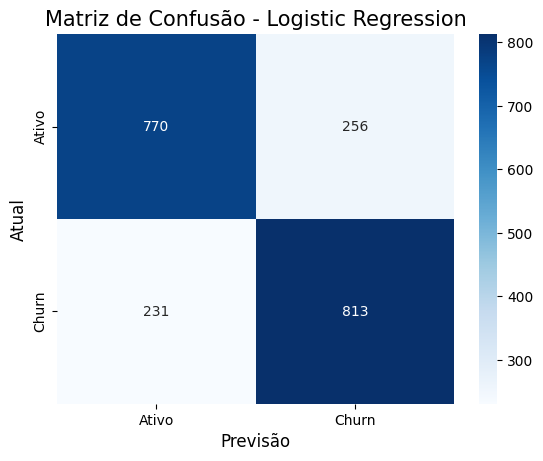

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1026
           1       0.76      0.78      0.77      1044

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [40]:
model_builder('Logistic Regression', LogisticRegression(), X_train, y_train, X_test, y_test)

## KNN
Para o KNN vamos avaliar qual o melhor valor de K, quantidade de neighbors, para o modelo e depois aplicar o modelo com o melhor valor de K.

In [41]:
def knn_model(k):
    '''
        Trains a KNN model and returns the classification report.
    '''

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    print(f"""{k} neighbors, precison: {round(precision_score(y_test, y_pred), 3)}, recall: {round(recall_score(y_test, y_pred), 3)}, f1-score: {round(metrics.f1_score(y_test, y_pred), 3)} and accuracy: {round(accuracy_score(y_test, y_pred), 3)}.""")

    return y_pred


In [42]:
for i in range(1, 20):
    knn_model(i)

1 neighbors, precison: 0.814, recall: 0.93, f1-score: 0.868 and accuracy: 0.857.
2 neighbors, precison: 0.826, recall: 0.819, f1-score: 0.823 and accuracy: 0.822.
3 neighbors, precison: 0.766, recall: 0.896, f1-score: 0.826 and accuracy: 0.81.
4 neighbors, precison: 0.784, recall: 0.787, f1-score: 0.785 and accuracy: 0.783.
5 neighbors, precison: 0.74, recall: 0.849, f1-score: 0.79 and accuracy: 0.773.
6 neighbors, precison: 0.759, recall: 0.761, f1-score: 0.76 and accuracy: 0.758.
7 neighbors, precison: 0.738, recall: 0.811, f1-score: 0.773 and accuracy: 0.76.
8 neighbors, precison: 0.758, recall: 0.776, f1-score: 0.767 and accuracy: 0.762.
9 neighbors, precison: 0.739, recall: 0.818, f1-score: 0.776 and accuracy: 0.762.
10 neighbors, precison: 0.753, recall: 0.784, f1-score: 0.768 and accuracy: 0.761.
11 neighbors, precison: 0.737, recall: 0.815, f1-score: 0.774 and accuracy: 0.76.
12 neighbors, precison: 0.748, recall: 0.775, f1-score: 0.761 and accuracy: 0.755.
13 neighbors, precis

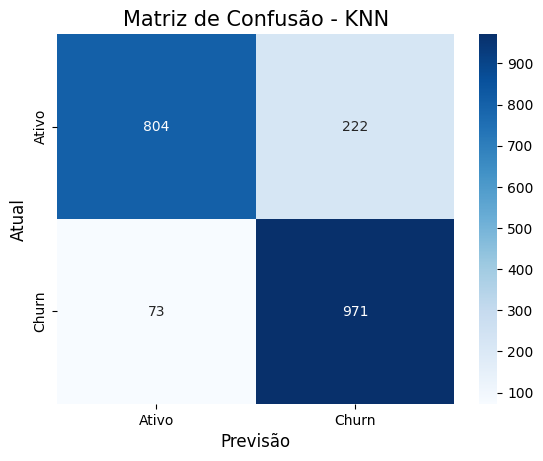

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1026
           1       0.81      0.93      0.87      1044

    accuracy                           0.86      2070
   macro avg       0.87      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [43]:
model_builder('KNN', KNeighborsClassifier(n_neighbors=1), X_train, y_train, X_test, y_test)

## SVM

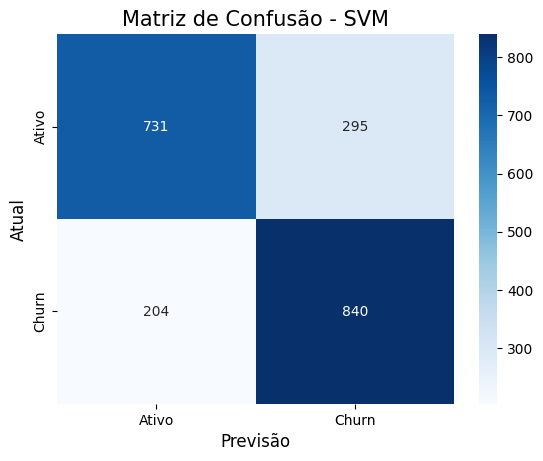

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1026
           1       0.74      0.80      0.77      1044

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



In [44]:
model_builder('SVM', SVC(), X_train, y_train, X_test, y_test)

## Random Forest

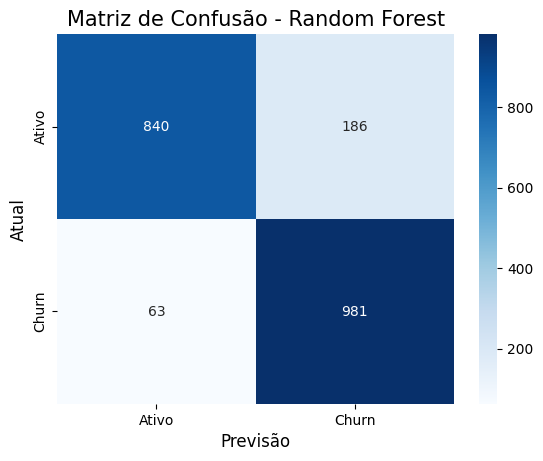

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1026
           1       0.84      0.94      0.89      1044

    accuracy                           0.88      2070
   macro avg       0.89      0.88      0.88      2070
weighted avg       0.89      0.88      0.88      2070



In [45]:
model_builder('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

## Gradient Boost

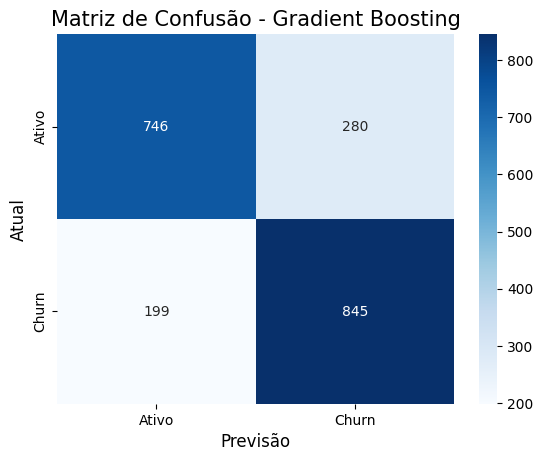

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1026
           1       0.75      0.81      0.78      1044

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [46]:
model_builder('Gradient Boosting', GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

## Resultado

Nesse primeiro teste dois modelos se saíram melhor, o KNN e o Random Forest. Porém, existe chance para o de KNN de overfitting, ou seja, enviesado. 

O Random Forest acertou 84% das vezes que ele disse que era Churn e 93% dos casos que eram Churn ou não o modelo acertou.

In [47]:
df_report

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.760524,0.778736,0.769522,0.764734
1,KNN,0.813915,0.930077,0.868127,0.857488
2,SVM,0.740088,0.804598,0.770996,0.758937
3,Random Forest,0.840617,0.939655,0.887381,0.879710
4,Gradient Boosting,0.751111,0.809387,0.779161,0.768599


A POC é apenas o primeiro passo, para construir algo mais robusto e que tenha impacto no negócio.

- Avaliar possível overfitting, adicionando mais dados ou desenhando os testes.
- Cross Validation no modelos.
- Feature Engineering, entender se de fato as variáveis escolhidas estão ajudando na classificação.
- Hyperparameter Tuning, ajustar os hiperparâmetros do modelos mais eficientes.
- Testar mais modelos

